In [12]:
import pandas as pd
import numpy as np
import random as rn
import tensorflow as tf

df = pd.read_pickle('mnist_data.pkl')

train_labels = np.array([df['trainLabels']])
train_images = np.array([df['trainImages']])

test_images = np.array(df['testImages'])
test_labels = np.array([df['testLabels']])

SEED = 6
np.random.seed(SEED)
rn.seed(SEED)
tf.random.set_seed(SEED)

In [13]:
img = []
for i in train_images[0]:
    val = []
    k = 0
    for j in range(28):
        val.append(i[k:k+28])
        k += 28
    # print(np.shape(val))
    img.append(val)
train_images = np.array(img)

np.shape(train_images)

(800, 28, 28)

In [14]:
img = []
for i in test_images:
    val = []
    k = 0
    for j in range(28):
        val.append(i[k:k+28])
        k += 28
    # print(np.shape(val))
    img.append(val)
test_images = np.array(img)

np.shape(test_images)

(200, 28, 28)

In [15]:
train_images = train_images.reshape(800,28,28,1)
test_images = test_images.reshape(200,28,28,1)

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
from keras import regularizers
#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='sigmoid', input_shape=(28,28,1)))
#model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='sigmoid'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, kernel_size=3, activation='sigmoid'))
# # model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, kernel_size=3, activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.85))
model.add(Dense(10, activation='softmax'))

In [18]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, y_train[0], validation_split=0.1, epochs=18)

Epoch 1/18
23/23 [==============================] - 3s 70ms/step - loss: 0.1169 - accuracy: 0.1028 - val_loss: 0.0952 - val_accuracy: 0.2000
Epoch 2/18
23/23 [==============================] - 1s 59ms/step - loss: 0.0996 - accuracy: 0.1069 - val_loss: 0.0910 - val_accuracy: 0.1625
Epoch 3/18
23/23 [==============================] - 2s 68ms/step - loss: 0.0907 - accuracy: 0.1528 - val_loss: 0.0891 - val_accuracy: 0.1750
Epoch 4/18
23/23 [==============================] - 1s 65ms/step - loss: 0.0860 - accuracy: 0.2528 - val_loss: 0.0832 - val_accuracy: 0.2750
Epoch 5/18
23/23 [==============================] - 1s 64ms/step - loss: 0.0745 - accuracy: 0.4097 - val_loss: 0.0628 - val_accuracy: 0.5875
Epoch 6/18
23/23 [==============================] - 2s 68ms/step - loss: 0.0572 - accuracy: 0.5750 - val_loss: 0.0406 - val_accuracy: 0.7500
Epoch 7/18
23/23 [==============================] - 1s 59ms/step - loss: 0.0429 - accuracy: 0.7042 - val_loss: 0.0316 - val_accuracy: 0.7750
Epoch 8/18
23

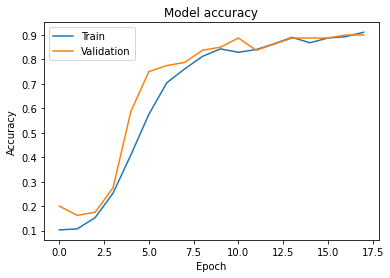

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

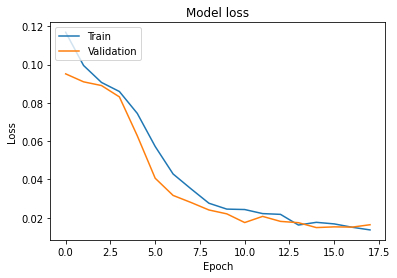

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [22]:
loss, accuracy = model.evaluate(test_images, y_test[0], verbose=1)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

7/7 [==============================] - 0s 15ms/step - loss: 0.0179 - accuracy: 0.8850
Test loss: 0.017936117947101593
Test accuracy: 0.8849999904632568
